# Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Url = https://raw.githubusercontent.com/SR1608/Datasets/main/coviddata.csv

## 1. Import the dataset using Pandas from above mentioned url

In [5]:
data = pd.read_csv("Covid_Analysis_Capstone_Project.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## 2. High Level Data Understanding:

In [6]:
# a. Find no. of rows & columns in the dataset

data.shape

(57394, 49)

In [10]:
#  b. Data types of columns.

data.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [11]:
#  c. Info & describe of data in dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [13]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


## 3. Low Level Data Understanding :

In [15]:
#  a. Find count of unique values in location column.
data['location'].nunique()

216

In [20]:
#  b. Find which continent has maximum frequency using values counts.

data['continent'].mode()

0    Europe
Name: continent, dtype: object

In [21]:
#  c. Find maximum & mean value in 'total_cases'

data["total_cases"].max()

55154651.0

In [22]:
data["total_cases"].mean()

167797.3688753302

In [24]:
# d. Find 25%,50% & 75% quartile value in 'total_deaths'.


quartiles = data['total_deaths'].quantile([0.25, 0.5, 0.75])

print("25% Quartile:", quartiles[0.25])
print("50% Quartile (Median):", quartiles[0.5])
print("75% Quartile:", quartiles[0.75])

25% Quartile: 13.0
50% Quartile (Median): 84.0
75% Quartile: 727.0


In [27]:
# e. Find which continent has maximum 'human_development_index'.

max_hdi_continent = data.loc[data['human_development_index'].idxmax(), 'continent']

max_hdi_continent

'Europe'

In [31]:
# f. Find which continent has minimum 'gdp_per_capita'.

gdp_per_capita = data.loc[data["gdp_per_capita"].idxmin(), "continent"]
gdp_per_capita 

'Africa'

## 4. Filter the dataframe with only this columns

In [32]:
selected_columns = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']

# Filter the DataFrame with selected columns
filtered_data = data[selected_columns]

# Update the original DataFrame
data = filtered_data

In [33]:
data.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


## 5. Data Cleaning

In [34]:
# a. Remove all duplicates observations

data.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [35]:
#  b. Find missing values in all columns

data.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [38]:
#  c. Remove all observations where continent column value is missing
# Tip : using subset parameter in dropna


data.dropna(subset=['continent'])

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [39]:
data.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


In [40]:
#  d. Fill all missing values with 0

data.fillna(0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000
57390,0,International,14/11/20,696.0,7.0,0.000,0.000
57391,0,International,15/11/20,696.0,7.0,0.000,0.000
57392,0,International,16/11/20,696.0,7.0,0.000,0.000


## 6. Date time format :
 

In [41]:
#  a. Convert date column in datetime format using pandas.to_datetime

data['date'] = pd.to_datetime(data['date'], errors='coerce')


In [42]:
data['date']

0       2019-12-31
1       2020-01-01
2       2020-02-01
3       2020-03-01
4       2020-04-01
           ...    
57389   2020-11-13
57390   2020-11-14
57391   2020-11-15
57392   2020-11-16
57393   2020-11-17
Name: date, Length: 57394, dtype: datetime64[ns]

In [43]:
# b. Create new column month after extracting month data from date column.


data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Create a new column 'month' by extracting month data
data['month'] = data['date'].dt.month
data['month']

0        12
1         1
2         2
3         3
4         4
         ..
57389    11
57390    11
57391    11
57392    11
57393    11
Name: month, Length: 57394, dtype: int32

## 7. Data Aggregation:

In [44]:
# a. Find max value in all columns using groupby function on 'continent'column
 # Tip: use reset_index() after applying groupby
    


max_values_by_continent = data.groupby('continent').max().reset_index()
max_values_by_continent

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [45]:
#  b. Store the result in a new dataframe named 'df_groupby'.
 # (Use df_groupby dataframe for all further analysis)
    

df_groupby = data.groupby('continent').max().reset_index()
df_groupby


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


## 8. Feature Engineering :

In [46]:
# a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

# Display the updated DataFrame
df_groupby.head()


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685


## 9. Data Visualization 

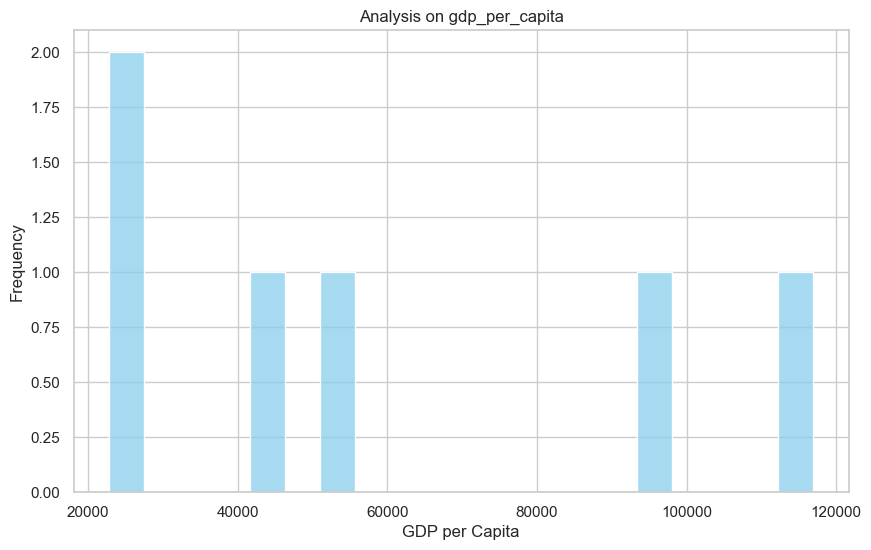

In [50]:
#  a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.


import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Plot a histogram using distplot
plt.figure(figsize=(10, 6))
sns.histplot(df_groupby['gdp_per_capita'], kde=False, bins=20, color='skyblue')

# Set plot labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.title('Analysis on gdp_per_capita')

# Show the plot
plt.show()

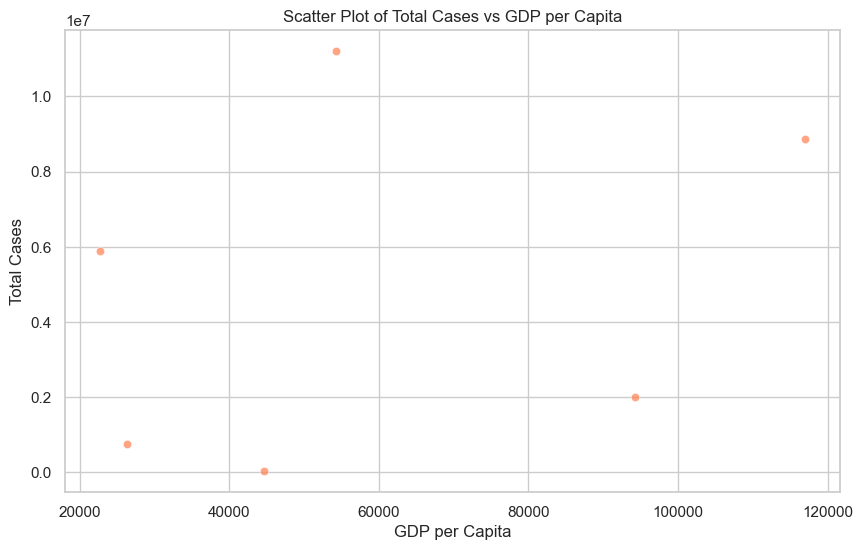

In [58]:
#  b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'


# Set the style for the plot
sns.set(style="whitegrid")

# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='total_cases',data=df_groupby, color='coral', alpha=0.7)

# Set plot labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.title('Scatter Plot of Total Cases vs GDP per Capita')

# Show the plot
plt.show()


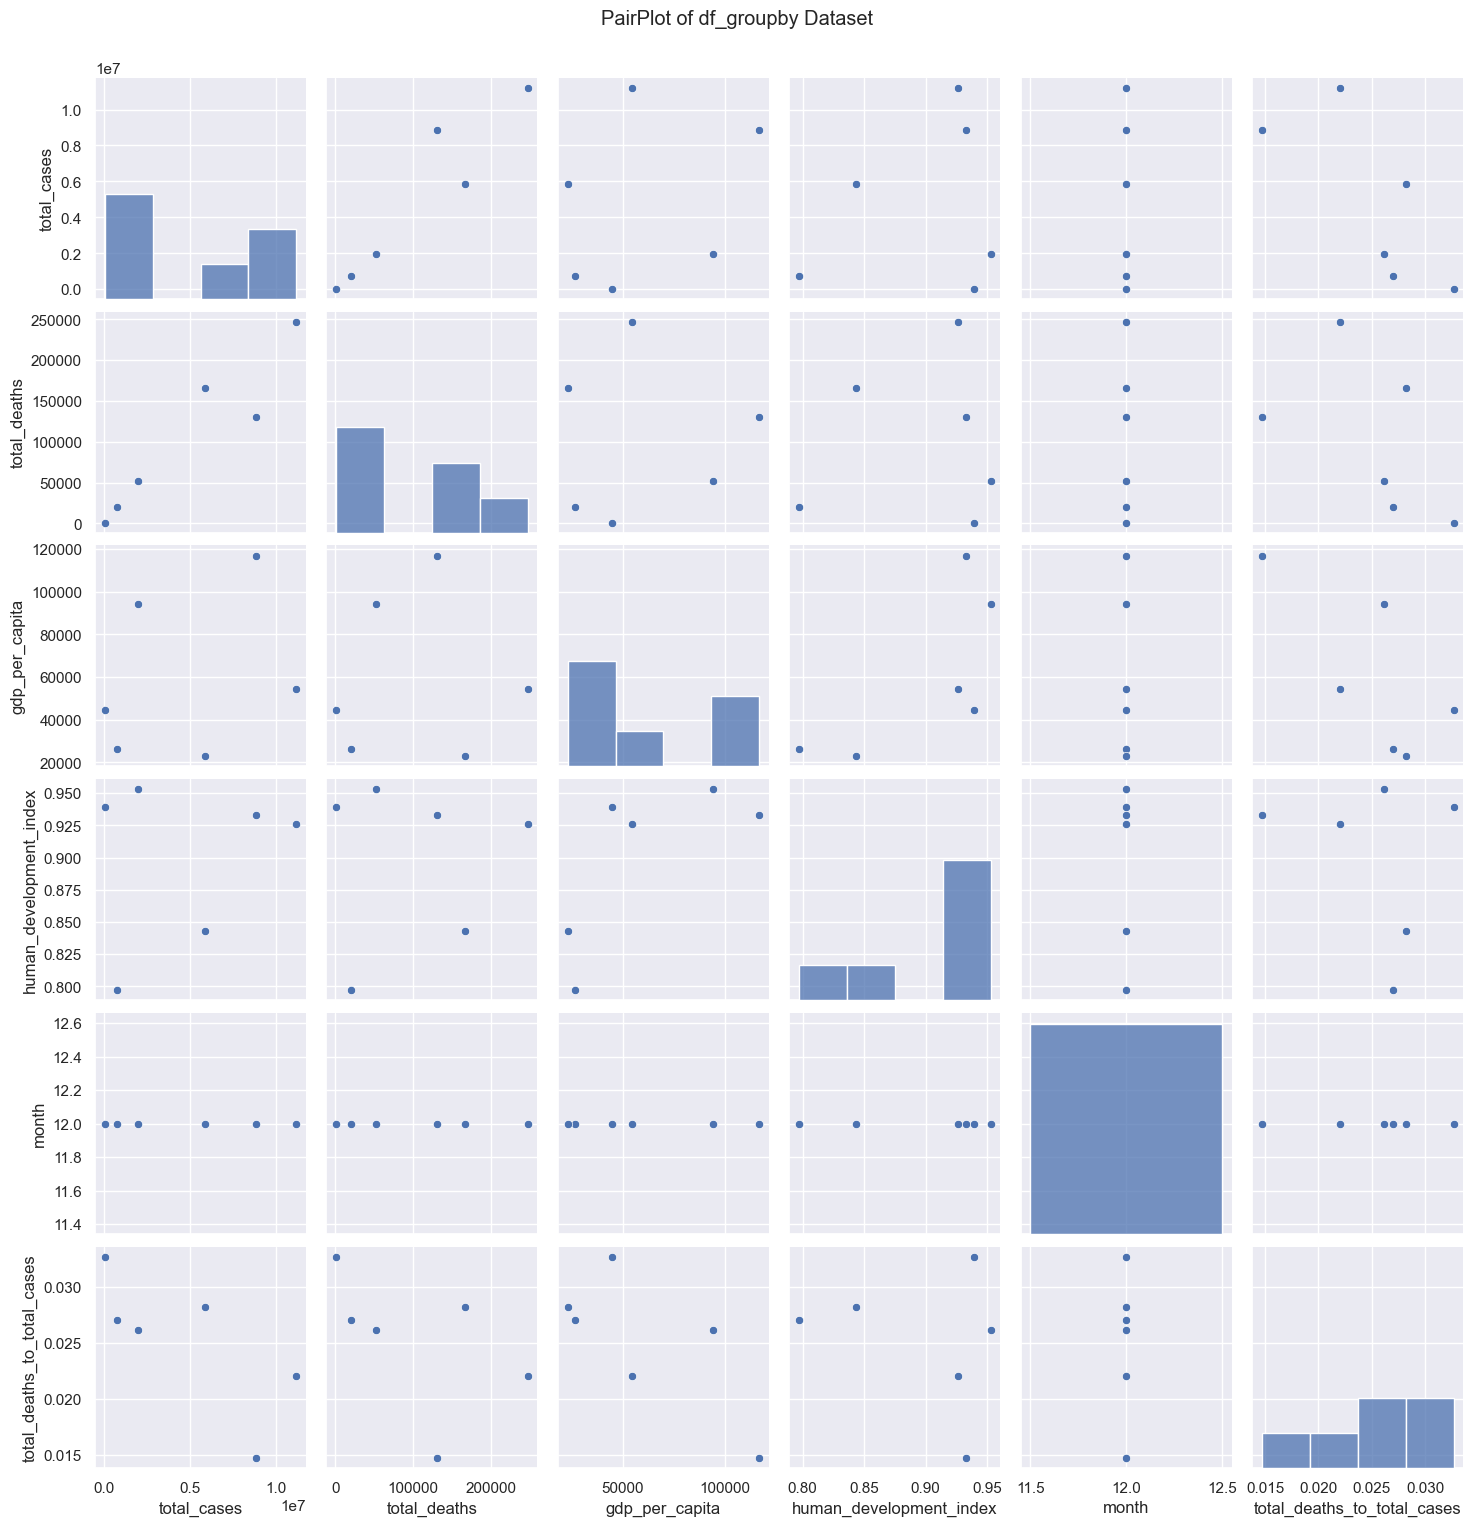

In [61]:
# c. Plot Pairplot on df_groupby dataset.


# Set the style for the plot
sns.set(style="darkgrid")

# Create a pair plot
sns.pairplot(df_groupby)
plt.suptitle('PairPlot of df_groupby Dataset', y=1.02)

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

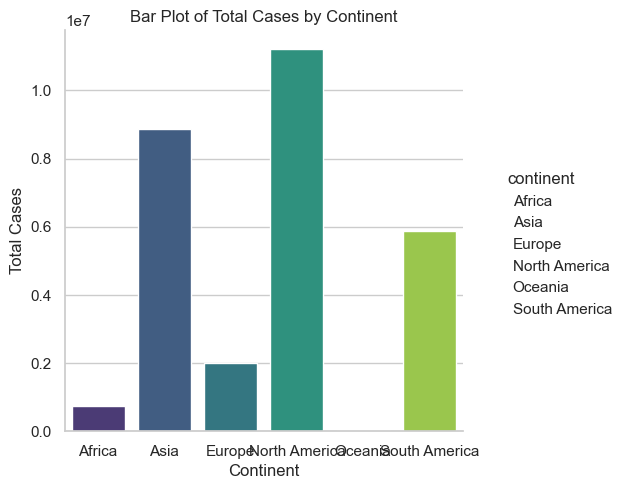

In [62]:
#  d. Plot a bar plot of 'continent' column with 'total_cases' .
# Tip : using kind='bar' in seaborn catplot


# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.catplot(x='continent', y='total_cases', data=df_groupby, kind='bar', palette='viridis')

# Set plot labels and title
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Bar Plot of Total Cases by Continent')

# Show the plot
plt.show()


## 10.Save the df_groupby dataframe in your local drive using pandas.to_csv function .

In [63]:

# Save df_groupby to a CSV file
df_groupby.to_csv('df_groupby.csv', index=False)

# Print a message to confirm the save
print("DataFrame df_groupby has been saved to df_groupby.csv")

DataFrame df_groupby has been saved to df_groupby.csv
